Code heavily referenced from ChatGPT, GitHub, GeekforGeeks, and StackOverflow.

# **Part 1. Visualizing Unlabeled Training Data. You are provided some unlabeled data in faces_AU.csv. Carefully select the features you wish you use, and using Principal Component Analysis, plot your data points in 2 dimensions. What is the explained variance for each component? Hint: Use sklearn's libraries and call StandardScaler before doing PCA.**


In [42]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn
%pip install umap-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Explained variance by component:  [0.20577816 0.12272501]


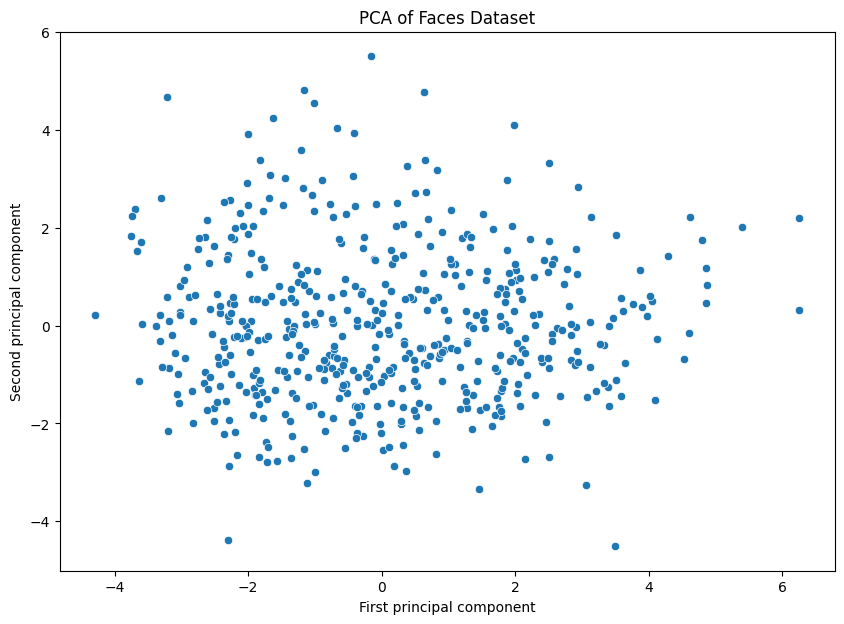

In [43]:
import pandas as pd  # https://pandas.pydata.org/
import numpy as np  # https://numpy.org/
from sklearn.preprocessing import StandardScaler  # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.decomposition import PCA  # https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
import matplotlib.pyplot as plt  # https://matplotlib.org/
import seaborn as sns  # statistical data visualization; https://seaborn.pydata.org/

data = pd.read_csv('faces/faces_AU.csv') # read data

features = [col for col in data.columns if '_r' in col]  # selects columns with '_r' in the name
# AU derived from https://www.cs.cmu.edu/~face/facs.htm
X = data[features]

scaler = StandardScaler() # use skLearn StandardScaler to scale the data
X_scaled = scaler.fit_transform(X) # fit the scaler to the data and transform the data

# PCA
pca = PCA(n_components=2)  # use PCA from skLearn to reduce the dimensionality to 2
X_pca = pca.fit_transform(X_scaled) # fit the PCA to the scaled data and transform the data

# Explained variance
print("Explained variance by component: ", pca.explained_variance_ratio_)

# Visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])
plt.title('PCA of Faces Dataset')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()


# **Part 2. K-Means and Silhouette Score. Using the PCA-reduced data (i.e, now each point is represented by 2 numbers), perform K-Means clustering and calculate a silhouette score for various values of K. Plot the scores for easier visualization. What is the optimal silhouette score that you find, and with which value of K? What does this signify? If you use scikit-learn KMeans, please set random_state = 0 to facilitate marking.**


Silhouette Score for k = 2: 0.39146340899047644
Silhouette Score for k = 3: 0.3780987232896614
Silhouette Score for k = 4: 0.34127632284320963
Silhouette Score for k = 5: 0.3407472902139676
Silhouette Score for k = 6: 0.3337168677343995
Silhouette Score for k = 7: 0.3432599067403407
Silhouette Score for k = 8: 0.3373181835881673
Silhouette Score for k = 9: 0.3429117846251442
Silhouette Score for k = 10: 0.33816831920270174


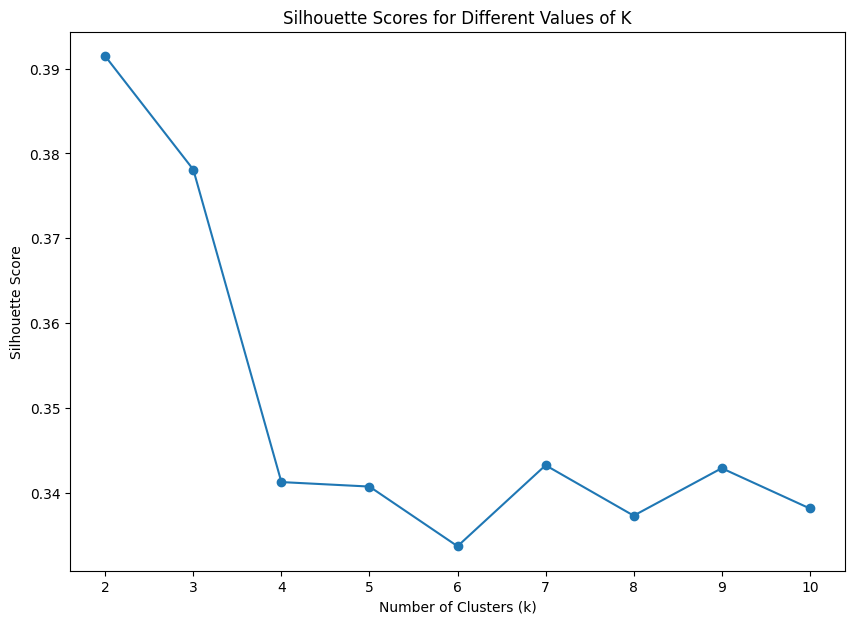

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = range(2, 11)  # simple value range for k

silhouette_scores = [] # array to store silhouette scores

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)  # k cluster values from 2 to 10, random_state=0 for reproducibility, n_init=10 for 10 initializations and suppress warnings
    cluster_labels = kmeans.fit_predict(X_pca)  # fit the kmeans model to the data and predict the clusters
    
    # calculate silhouette score
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for k = {k}: {silhouette_avg}")

# use plots from matplotlib to visualize the silhouette scores, higher is better
plt.figure(figsize=(10, 7))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Values of K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


# **Part 3. Cluster Interpretation. Use your chosen K from Part 2 and visualize the clusters as calculated using K-Means. In other words, each point should now be coloured based on the cluster it belongs to. Using the faces image folder provided, inspect the clusters and the corresponding images. What labels can you propose for the clusters?**


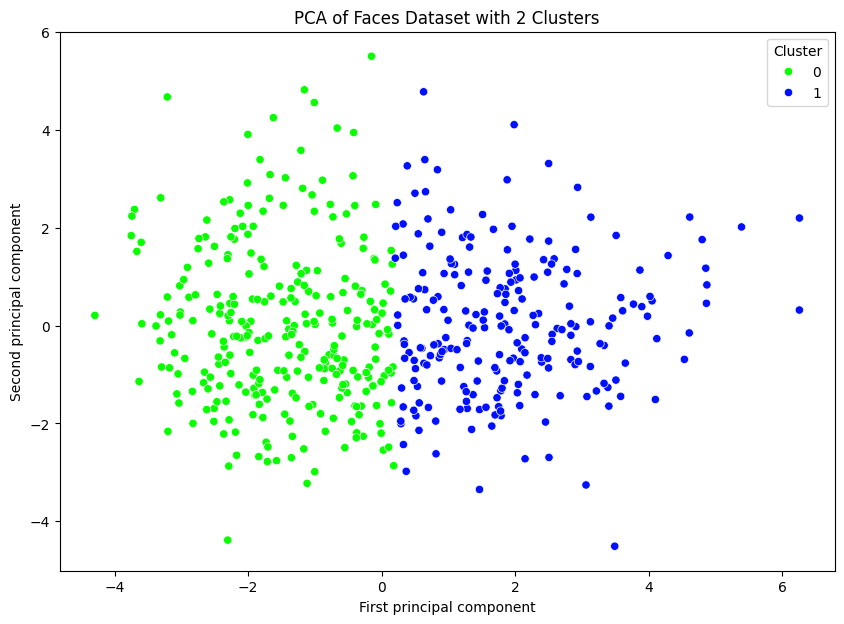

In [45]:
# max silhouette score
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because k_values start at 2

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=0)
cluster_labels_optimal = kmeans_optimal.fit_predict(X_pca)

# visualize the clusters
plt.figure(figsize=(10, 7))
palette = sns.color_palette('hsv', optimal_k)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels_optimal, palette=palette)
plt.title(f'PCA of Faces Dataset with {optimal_k} Clusters')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend(title='Cluster')
plt.show()


# **Part 4. Use UMAP. Now, use UMAP to perform dimensionality reduction and repeat K-Means for clustering. How many clusters are found, and how does it compare to what you found in Part 3? Plot the clustering results in a visualization.**


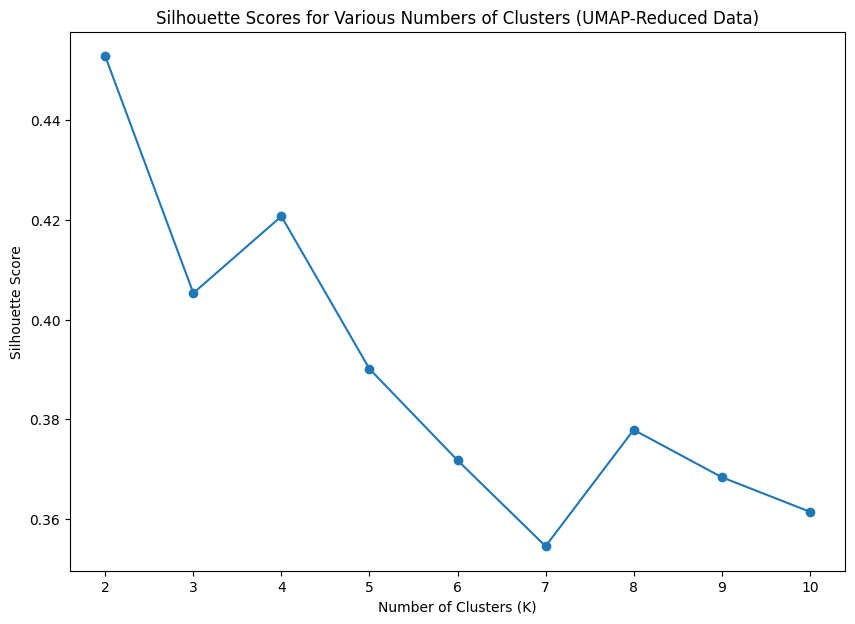

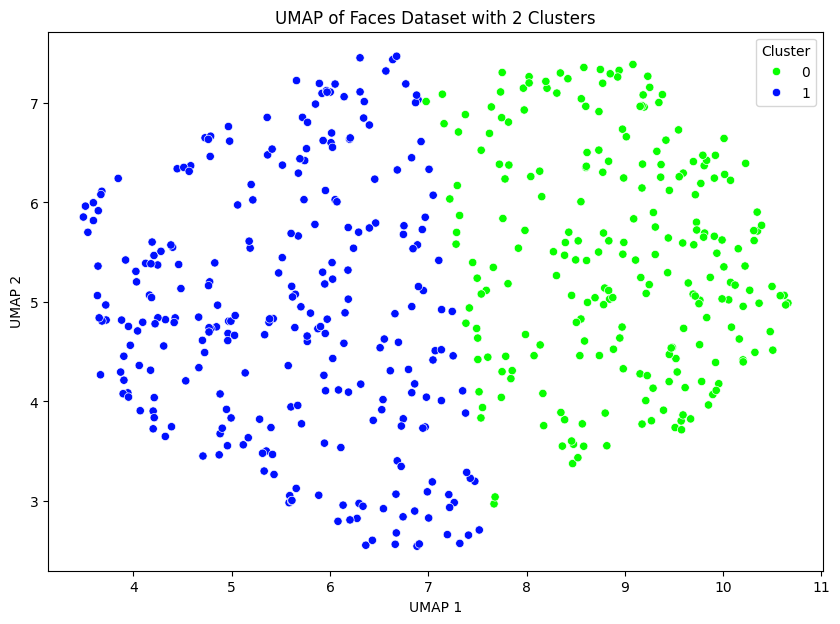

In [46]:
import umap.umap_ as umap # https://umap-learn.readthedocs.io/en/latest/

# UMAP dimensionality reduction
reducer = umap.UMAP(random_state=0, n_jobs=1) # use UMAP from umap-learn to reduce the dimensionality to 2, set random_state=0 for reproducibility, n_jobs=1 to suppress warnings and produce determinstic results
X_umap = reducer.fit_transform(X_scaled)

silhouette_scores = []
k_values = range(2, 11) 
for K in k_values:
    kmeans = KMeans(n_clusters=K, random_state=0)
    cluster_labels = kmeans.fit_predict(X_umap)
    silhouette_avg = silhouette_score(X_umap, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 7))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Numbers of Clusters (UMAP-Reduced Data)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

optimal_k_umap = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because range starts at 2

# visualize the clusters
kmeans_optimal_umap = KMeans(n_clusters=optimal_k_umap, random_state=0)
cluster_labels_optimal_umap = kmeans_optimal_umap.fit_predict(X_umap)

plt.figure(figsize=(10, 7))
palette = sns.color_palette('hsv', optimal_k_umap)  # color per number of clusters
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=cluster_labels_optimal_umap, palette=palette)
plt.title(f'UMAP of Faces Dataset with {optimal_k_umap} Clusters')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Cluster')
plt.show()
